In [1]:
import numpy
import sympy
from matplotlib import pyplot, cm
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16
sympy.init_printing()

In [2]:
import urllib.request

# Download and read the data file.
url = ('https://github.com/numerical-mooc/numerical-mooc/blob/master/'
       'lessons/04_spreadout/data/uvinitial.npz?raw=true')
filepath = 'uvinitial.npz'
urllib.request.urlretrieve(url, filepath);

In [3]:
# Read the initial fields from the file.
# Load the initial data from file.
filepath = 'uvinitial.npz'
with open(filepath, 'rb') as infile:
    data = numpy.load(infile)
    u0, v0 = data['U'], data['V']

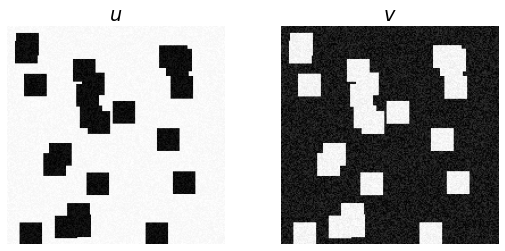

In [4]:
# Plot the initial fields.
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize=(9.0, 4.0))
ax1.set_title('$u$')
ax1.imshow(u0, cmap=cm.Greys_r)
ax1.axis('off')
ax2.set_title('$v$')
ax2.imshow(v0, cmap=cm.Greys_r)
ax2.axis('off');

It was the scheme to achieve second-order accuracy in both space and time. Numerical dispersion occurs when a higher order discretisation scheme is used to improve accuracy of the result. This is due to the truncation error of the discretisation, a second order upwind method, the leading truncation error is odd, and odd order derivatives contribute to numerical dispersion.

In [5]:
def ftcs(u0, v0, nt, dt, dx, dy, Du, Dv, F, k):
    # Define some constants.
    sigma_xu = Du * dt / dx**2
    sigma_yu = Du * dt / dy**2
    sigma_xv = Dv * dt / dx**2
    sigma_yv = Dv * dt / dy**2
    # Integrate in time
    u = u0.copy()
    v = v0.copy()
    u_hist = []
    v_hist = []
#     ny, nx = u.shape
    for n in range(nt):
        u[1:-1, 1:-1] = u[1:-1, 1:-1] - dt*u[1:-1, 1:-1] * v[1:-1, 1:-1]**2 + dt * F * (1 - u[1:-1, 1:-1]) + sigma_xu * (u[1:-1, 2:] - 2.0 * u[1:-1, 1:-1] + u[1:-1, :-2]) + sigma_yu * (u[2:, 1:-1] - 2.0 * u[1:-1, 1:-1] + u[:-2, 1:-1])
        v[1:-1, 1:-1] = v[1:-1, 1:-1] + dt*u[1:-1, 1:-1] * v[1:-1, 1:-1]**2 - dt* (F + k) * v[1:-1, 1:-1] + sigma_xv * (v[1:-1, 2:] - 2.0 * v[1:-1, 1:-1] + v[1:-1, :-2]) + sigma_yv * (v[2:, 1:-1] - 2.0 * v[1:-1, 1:-1] + v[:-2, 1:-1])
        # Apply Neumann conditions
        u[-1, :] = u[-2, :]
        u[:, -1] = u[:, -2]
        u[0, :] = u[1, :]
        u[:, 0] = u[:, 1]
        v[-1, :] = v[-2, :]
        v[:, -1] = v[:, -2]
        v[0, :] = v[1, :]
        v[:, 0] = v[:, 1]
        
        u_hist.append(u.copy())
        v_hist.append(v.copy())
        
    return u_hist, v_hist
        
        

In [6]:
# Set spatial parameters.
Lx, Ly = 5.0, 5.0  # domain dimensions
nx, ny = 192, 192  # number of points in each direction
dx, dy = Lx / (nx - 1), Ly / (ny - 1)  # grid spacings

# Create the gridline locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Set parameters of the pattern.
Du, Dv = 0.00016, 0.00008  # rates of diffusion
F, k = 0.035, 0.060  # parameters to feed and kill

# Set temporal parameters.
t0 = 0.0
t = 8000
dt = 9.0 * dx**2 / (40.0 * max(Du, Dv))  # time-step size
nt = 1000  # number of time steps

In [7]:
u_hist, v_hist= ftcs(u0, v0, nt, dt, dx, dy, Du, Dv, F, k)


In [8]:
import ipywidgets


def plot_species_concentration(u_hist, state):
    fig, ax = pyplot.subplots(figsize=(6.0, 6.0))
    ax.imshow(u_hist[state], vmin=0.5, vmax=1.0,
              interpolation='bicubic', cmap=cm.Greys_r)
    ax.axis('off')


def interactive_figure(u_hist):
    nt = len(u_hist) - 1
    state_slider = ipywidgets.IntSlider(value=0, min=0, max=nt,
                                        step=1,
                                        description='state')
    w = ipywidgets.interactive(plot_species_concentration,
                               u_hist=ipywidgets.fixed(u_hist),
                               state=state_slider)
    return w


# Display the history of the first species concentration.
display(interactive_figure(u_hist))

interactive(children=(IntSlider(value=0, description='state', max=999), Output()), _dom_classes=('widget-inter…

In [9]:
a = u_hist[-1].copy()
u_sample = a[100, ::40]
print(u_sample)

[0.9985286  0.59597234 0.39688384 0.74579087 0.57737006]


In [10]:
help(numpy.stack)

Help on function stack in module numpy:

stack(arrays, axis=0, out=None)
    Join a sequence of arrays along a new axis.
    
    The ``axis`` parameter specifies the index of the new axis in the
    dimensions of the result. For example, if ``axis=0`` it will be the first
    dimension and if ``axis=-1`` it will be the last dimension.
    
    .. versionadded:: 1.10.0
    
    Parameters
    ----------
    arrays : sequence of array_like
        Each array must have the same shape.
    
    axis : int, optional
        The axis in the result array along which the input arrays are stacked.
    
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what stack would have returned if no
        out argument were specified.
    
    Returns
    -------
    stacked : ndarray
        The stacked array has one more dimension than the input arrays.
    
    See Also
    --------
    concatenate : Join a sequenc